In [1]:
import sys
sys.path.insert(0, "..")

##### Investigate

- Break GFE into its indivdual contributions
- Zr3S4 phonon data?
- S2/S8 gas HSE06 data?
- QHA calculations...

## Ba + Zr + 3s <-> BaZrS3

In [1]:
import numpy as np
from thermopot import materials, calculations, reactions, potentials

In [ ]:
BaZrS3_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/ternary/BaZrS3_Pnma/scan/aims.out")
Ba_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/elemental/Ba_Im-3m/scan/aims.out")
Zr_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/elemental/Zr_P63_mmc/scan/aims.out")
S_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/elemental/S_P2_c/scan/aims.out")
print(vars(BaZrS3_calc))
print(vars(Ba_calc))
print(vars(Zr_calc))
print(vars(S_calc))


In [ ]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},
                                                          "."
                                                          "./BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)
Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},"../BaZrS3/phonopy_output/Zr_P63_mmc"
                                    ".dat",calculation=Zr_calc)
S = materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",
                    calculation=S_calc)

In [ ]:
vars(BaZrS3)

In [ ]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1})
print(bulk_reaction.DE(xc='scan')/5)
print(bulk_reaction.DH(xc='scan',T=0).potential / 5)

In [ ]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.Dmu(xc='scan').potential / 5

The above figure compares to a formation energy of -1.818 eV/atom reported on the materials project.

In [ ]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(-3,6,100),ndmin=2).transpose() # Pa

bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)

In [ ]:
GFE = bulk_reaction.Dmu(xc='scan',units="kJ")
GFE.plot_TvsP(scale_range=[-1050,-1020])

The above Gibbs formation energy is in the -9eV range, and shifts by an amount
(~ 25kJ) comparable to the CZTS study (~ 30kJ), with a weak dependence  on
Pressure, as expected.

## 2Ba+2Zr+3S2 <-> 2BaZrS3

In [ ]:
S2_calculation = calculations.AimsCalculation("../BaZrS3/raw_aims_files/elemental/S2/scan/aims.out",gas=True)

In [ ]:
vars(S2_calculation)

In [ ]:
S2 = materials.IdealGas("S2",{'S':2},thermo_file="../BaZrS3/nist_janaf/S2.dat",calculation=S2_calculation)
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},temperature=T,pressure=P,fu=2)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1350, -850])

Again, there is agreement here with what would be expected from the CZTS
study. For the sulphur gas there is a greater variation with both
temperature and pressure. However it is stable in all regimes. In general
BaZrS3 shows increased stability compared to CZTS, which is to be expected
from previous reports.


# 8Ba + 8Zr + 3S8 <-> 8BaZrS3

In [ ]:
S8_calculation = calculations.AimsCalculation("../BaZrS3/raw_aims_files/elemental/S8/scan/aims.out",gas=True)

In [ ]:
S8 = materials.IdealGas("S8",{'S':8},thermo_file="../BaZrS3/nist_janaf/S8"
                                                 ".dat",
                        calculation=S8_calculation)
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,
pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1050, -900])

There is again a similar trend as to that seen for CZTS, with a stability that varies more slowly with temperature in an S8 environment.
formation is stable even in extreme environments. Stronger pressure dependance at higher temperatures, driven by entropy.


It would be nice to understand the different contributions that S2 and S8
make to the Gibbs formation energy - perhaps a plot with a breakdown of the
U, ST and PV terms would give greater insight.

# BaS + ZrS2 <-> BaZrS3

These are the binaries typically used as Ba is formally a +2 cation and Zr
is formally a 4+ cation.

In [ ]:
BaS_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/BaS_Fm-3m/scan/aims.out")
ZrS2_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/ZrS2_P-3m1/scan/aims.out")
BaS = materials.Solid("BaS",{"Ba": 1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2}, "../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)

In [ ]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.DH(units="eV",xc='scan').potential

 Previously reported energies are in the range -450 to -200 meV per fu (https://onlinelibrary.wiley.com/doi/full/10.1002/adom.202101704).
 This could be more accurate value as using SCAN (better description for layered materials?)




The Jarvis database has carefully converged calculations for layered
materials like ZrS2. for convergenve to 0.001eV a 600eV plane wave cutoff was required
(https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-82.xml). This is below the threshold used by some high-throughput codes.

Also need to consider the volumes of the starting materials to begin with.

OQMD: ZrS2: 23.626 / atom, BaS: 33.483
MP: ZrS2: 25.999 / atom, BaS: 33.655
Our calcs: ZrS2: 22.24977 / atom, BaS: 31.6276
NoMAD: ZrS2: 22.5044 / BaS: 32.09555

In [ ]:
vars(ZrS2)

We expect there to be some discrepancy due to finite temperature
effects  (entropy and  volume dependence) and inexact
exchange-correlation functions. Our value is not  as close to the
experimental value.

ZrS2:  -1.993 eV/atom (from the OQMD experimental entry)
 -1.709 eV/atom (from the OQMD calculated entry)

Our calculation is closer to the experimental values.


In [ ]:
ZrS2_reaction = reactions.Reaction({ZrS2:1},{Zr:1,S:2})
ZrS2_reaction.DE(xc='scan') / 3

I've reproduced the vasp calculations for BaS+ZrS2 -> BaZrS3 and get a formation energy of 328meV:


In [ ]:
(-127.81222203/4) -((-40.74207761/4)+-21.43924922)

There is a clear discrepancy in the structures for ZrS2. We calculate a c-axis of 5.86, whilst vasp gives a c-axis of 6.61. Our value is considerably closer to the experimental value of 5.85 (D.L. Greenaway; R. Nitsche (1965)). Another paper also states that the experimental lattice parameters are between 5.81 and 5.86 and uses the revB86b functional for reproducing the experimental lattice parameters (Phonons and Excitons in ZrSe2 - ZrS2 Alloys).

In [ ]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=T,
                                   pressure=P)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-57, -47],precision="%.2f",T_units="C")

Chemical accuracy is around 4kJ/mol. So this
is telling us that it is stable across all synthesis conditions. However less stable to binary composition compared to other PV materials, such as CZTS (10* more stable).
Logical as Binaries are stable compared to their elemental precursors.

The interesting thing here is that the material becomes more stable as the
temperature increases.

Some discussion on whether entropy can stabilise reactants more than
products here: https://iopscience.iop.org/article/10.1088/1361-6463/aae1ee/meta

Again, could visualise the different contributions to the Gibbs free energy to understand this trend.

# BaS2 + ZrS <-> BaZrS3

Note that we are using the more stable of the ZrS compounds

In [ ]:
BaS2_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/BaS2_C2_c/scan/aims.out")
ZrS_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/ZrS_P4_nmm/scan/aims.out")
BaS2 = materials.Solid("BaS2",{"Ba": 1, "S": 2},"."
                                               ""
                                               "./BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)

In [ ]:
vars(ZrS_calc)

In [ ]:
ZrS_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/ZrS_Fm-3m/scan/aims.out")

In [ ]:
vars(ZrS_calc)

In [ ]:
ZrS_calc.energy*2  # -----> P4_nmn is the more stable so will be the one that we use

In [ ]:
ZrS_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/ZrS_P4_nmm/scan/aims.out")
ZrS = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_P4_nmm.dat",
                      calculation=ZrS_calc)

In [ ]:
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=0,
                                   pressure=0)
bulk_reaction.DH(units="eV",xc='scan').potential

In [ ]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(-3,6,100),ndmin=2).transpose() # Pa
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=T, pressure=P)
GFE = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-234, -229])

Much more stable compared to these less stable reactants....possible suggestion for synthesis route??

# 2BaS + 2ZrS + S2 <-> 2BaZrS3


In [ ]:
S2_binary_reaction = reactions.Reaction({BaS:2,ZrS:2,S2:1},{BaZrS3:2},
                                       temperature=T, pressure=P,fu=2)
GFE = S2_binary_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-340, -200])

 Note that at high-T
sulphur gas is more likely found in the S2 allotrope (so at high T this
gives a better picture of the energetics when compared to S8).

# 8BaS + 8ZrS + S8 <-> 8BaZrS3

In [ ]:
S8_binary_reaction = reactions.Reaction({BaS:8,ZrS:8,S8:1},{BaZrS3:8},
                                       temperature=T, pressure=P,fu=8)
GFE = S8_binary_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-245, -215])

These results are consistent with the findings for decomposition into S8 and
 elemental phases. Similar behaviour to S2 but with lesser sensitivity to
 the T,P conditions.

# ZrS (Fm-3m) <-> ZrS (P4nmm)

In [ ]:
ZrS_P4nmm = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_P4_nmm.dat",
                      calculation=ZrS_calc)
ZrS_Fm3m_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/ZrS_Fm-3m/scan/aims.out")
ZrS_Fm3m = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_Fm-3m.dat",
                      calculation=ZrS_Fm3m_calc)

In [ ]:
ZrS_reaction = reactions.Reaction({ZrS_Fm3m:1},{ZrS_P4nmm:1},
                                       temperature=T, pressure=P,fu=1)

In [ ]:
GFE = ZrS_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-29, -19])

At all temperatures the ZrS_P4nmm polymorph is more stable.

# Ba3Zr2S7 + ZrS2 <-> 3BaZrS3

In [ ]:
# TODO: closeer analysis here on which polymorph is most stable at finite
#  temperature

In [ ]:
Ba3Zr2S7_calc_Cmmm = calculations.AimsCalculation("../BaZrS3/raw_aims_files/ternary/Ba3Zr2S7_Cmmm/scan/aims.out")
vars(Ba3Zr2S7_calc_Cmmm )

In [ ]:
Ba3Zr2S7_calc_I4 = calculations.AimsCalculation("../BaZrS3/raw_aims_files/ternary/Ba3Zr2S7_I4_mmm/scan/aims.out")
Ba3Zr2S7_calc_I4.energy*2

In [ ]:
Ba3Zr2S7_calc_P42 = calculations.AimsCalculation("../BaZrS3/raw_aims_files/ternary/Ba3Zr2S7_P42_mnm/scan/aims.out")
Ba3Zr2S7_calc_P42.energy/2

These are all very close in energy - 5 meV per atom!!!

In [ ]:
(-1898664.2125250294--1898664.069287685 )/24

In [ ]:
Ba3Zr2S7 = materials.Solid("Ba3Zr2S7",{"Ba": 3,"Zr": 2,"S":7},
                           "../BaZrS3/phonopy_output/Ba3Zr2S7_P42_mnm.dat",
                           calculation=Ba3Zr2S7_calc_P42)

In [ ]:
ternary_reaction = reactions.Reaction({Ba3Zr2S7:1,ZrS2:1},{BaZrS3:3},
                                      temperature=T, pressure=P, fu=3)

In [ ]:
GFE = ternary_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-15, -12])

This is a relatively small GFE now. Perhaps a QHA calculation would push it over tipping point into perovskite being unstable, as the ZrS2 probably has a large expansion coefficient.

In [ ]:
Ba3Zr2S7 = materials.Solid("Ba3Zr2S7",{"Ba": 3,"Zr": 2,"S":7},
                           "../BaZrS3/phonopy_output/Ba3Zr2S7_I4_mmm.dat",
                           calculation=Ba3Zr2S7_calc_I4)
ternary_reaction = reactions.Reaction({Ba3Zr2S7:1,ZrS2:1},{BaZrS3:3},
                                      temperature=T, pressure=P, fu=3)
GFE = ternary_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-15, -12])

In [ ]:
Ba3Zr2S7 = materials.Solid("Ba3Zr2S7",{"Ba": 3,"Zr": 2,"S":7},
                           "../BaZrS3/phonopy_output/Ba3Zr2S7_Cmmm.dat",
                           calculation=Ba3Zr2S7_calc_Cmmm)
ternary_reaction = reactions.Reaction({Ba3Zr2S7:1,ZrS2:1},{BaZrS3:3},
                                      temperature=T, pressure=P, fu=3)
GFE = ternary_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-15, -12])

In [ ]:
ternary_reaction.Dmu(units="eV",xc='scan',T=900).potential

# Ba3Zr2S7 + ZrS + 0.5S2 <-> 3BaZrS3

In [ ]:
reaction = reactions.Reaction({Ba3Zr2S7:1,ZrS:1,S2:0.5},{BaZrS3:3},temperature=T, pressure=P, fu=3)
GFE = reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-110, -60])

Degradation into the RP phase isn't reported however it is expected that
there would be significant kinetic barriers for forming this phase.



# Ba3Zr2S7  <-> 3BaS + 2ZrS +S2

In [ ]:
ternary_gas_reaction = reactions.Reaction({Ba3Zr2S7:1},{BaS:3,ZrS:2,S2:1},
                                      temperature=T, pressure=P, fu=1)
GFE = ternary_gas_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[650, 400])

#  2BaZrS3 <-> Ba2ZrS4 + ZrS2

In [ ]:
Ba2Zr1S4_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/ternary/Ba2ZrS4_I4_mmm/scan/aims.out")
Ba2Zr1S4 = materials.Solid("Ba2Zr1S4",{"Ba": 2,"Zr": 1,"S":4}, "../BaZrS3/phonopy_output/Ba2ZrS4_I4_mmm.dat", calculation=Ba2Zr1S4_calc)
ternary_reaction = reactions.Reaction({BaZrS3:2},{Ba2Zr1S4:1,ZrS2:1},
                                      temperature=T, pressure=P, fu=2)
GFE = ternary_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[16,21])

#  2BaZrS3 <-> Ba2ZrS4 + ZrS + 0.5S2

In [ ]:
reaction = reactions.Reaction({Ba2Zr1S4:1,ZrS:1,S2:0.5},{BaZrS3:2},temperature=T, pressure=P, fu=2)
GFE = reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-160, -90])

# BaS + S2 <-> BaS3

In [ ]:
BaS3_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/BaS3_P-421m/scan/aims.out")
BaS3 = materials.Solid("BaS3",{"Ba": 1,"S":3},
                           "../BaZrS3/phonopy_output/BaS3_P-42_1m.dat",
                           calculation=BaS3_calc)

In [ ]:

T = np.linspace(823, 863, 100)  # K
P = np.array(np.linspace(0.1, 5, 100), ndmin=2).transpose()  # Pa
Ba_S_reaction = reactions.Reaction({BaS:1,S2:1},{BaS3:1},temperature=T,
                                   pressure=P)
GFE = Ba_S_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(log_scale=False)

Ok, so this is interesting! BaS3 is formed below ~700K. Above
this value it is not energetically favourable to form BaS3.

This results corresponds EXACTLY with what shown by Comparetto et al. Yay!
They have temperature of 590 degrees C, and see best when 2-4Pa range.

Another thing to note is that BaS3 has a melting point of 554 °C (827K). If at 827, the sulfur partial pressure must be high to form BaS.

As we increase the partial pressure of sulphur the formation of BaS3 becomes
more favourable.

# 4BaS + S8 <-> 4BaS3

In [ ]:

T = np.linspace(723, 963, 100)  # K
P = np.array(np.logspace(0.01, 8, 100), ndmin=2).transpose()  # Pa

Ba_S_reaction = reactions.Reaction({BaS:4,S8:1},{BaS3:4},temperature=T,
                                   pressure=P,fu=4)
GFE = Ba_S_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP()

# 2Ba + 3S2 <-> 2BaS3



In [ ]:
Ba_S_reaction = reactions.Reaction({Ba: 2, S2: 3}, {BaS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Ba_S_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP()

# 8Ba + 3S8 <-> 8BaS3

In [ ]:
Ba_S_reaction = reactions.Reaction({Ba: 8, S8: 3}, {BaS3: 8}, temperature=T,
                                   pressure=P,fu=8)
GFE = Ba_S_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP()

# Competing phases for the Ba-S system

## BaS3 as a re-crystallisation flux

Using S8 for comparison with Scragg results

8Ba + 3S8 could form:
- 8BaS + 2S8
- 8BaS2 + S8
- 8BaS3

or

2Ba + 3S2 could form:

- 2BaS + 2S2
- 2BaS2 + S2
- 2BaS3

In [ ]:
T = np.linspace(0, 1000, 100)  # K
P = np.array(np.logspace(-1, 7, 100), ndmin=2).transpose()  # Pa

BaS_reaction = reactions.Reaction({Ba:8,S8:3},{BaS:8,S8:2},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS2:8,S8:1},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3:8},temperature=T,pressure=P,fu=8)

BaS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-6,-4])
BaS2_reaction.Dmu(xc='scan').plot_TvsP()
BaS3_reaction.Dmu(xc='scan').plot_TvsP()

In [ ]:

T = np.linspace(300, 1000, 100)  # K
P = np.array(np.logspace(-2, 4, 100), ndmin=2).transpose()  # Pa

BaS_system = potentials.Potentials(BaS_reaction.Dmu(xc='scan',T=T,P=P),BaS2_reaction.Dmu(xc='scan',T=T,P=P),BaS3_reaction.Dmu(xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],T_units="K",log_scale=True)
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()


In [ ]:
T = np.linspace(0, 1000, 100)  # K
P = np.array(np.logspace(-1, 7, 100), ndmin=2).transpose()  # Pa

BaS_reaction = reactions.Reaction({Ba:2,S2:3},{BaS:2,S2:2},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:2,S2:3},{BaS2:2,S2:1},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:2,S2:3},{BaS3:2},temperature=T,pressure=P,fu=8)

BaS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-2,-1])
BaS2_reaction.Dmu(xc='scan').plot_TvsP()
BaS3_reaction.Dmu(xc='scan').plot_TvsP()




In [ ]:
## See Scragg SI and Adam's paper for justification about which allotrope is the correct one to use
# oxides in nature, quite under-reported.
# precursors or reactants rather than end point.

T = np.linspace(300, 1000, 100)  # K
P = np.array(np.logspace(-2, 4, 100), ndmin=2).transpose()  # Pa

BaS_system = potentials.Potentials(BaS_reaction.Dmu(xc='scan',T=T,P=P),BaS2_reaction.Dmu(xc='scan',T=T,P=P),BaS3_reaction.Dmu(xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],T_units="K",log_scale=True)
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()


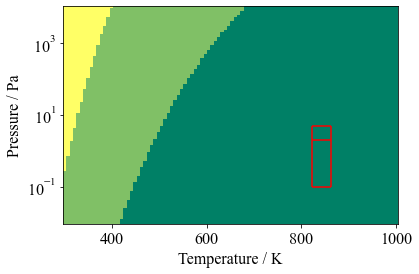

In [74]:

T = np.linspace(300, 1000, 100)  # K
P = np.array(np.logspace(-2, 4, 100), ndmin=2).transpose()  # Pa

BaS_system = potentials.Potentials(BaS_reaction.Dmu(xc='scan',T=T,P=P),BaS2_reaction.Dmu(xc='scan',T=T,P=P),BaS3_reaction.Dmu(xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],T_units="K",log_scale=True)
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()


<module 'matplotlib.pyplot' from '/Users/mynf8/opt/miniconda3/envs/thermo-model/lib/python3.8/site-packages/matplotlib/pyplot.py'>

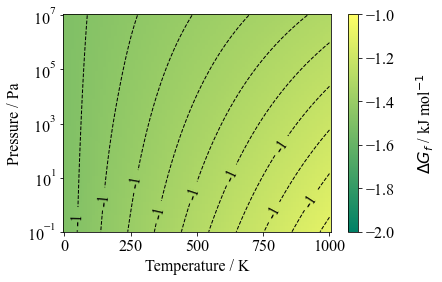

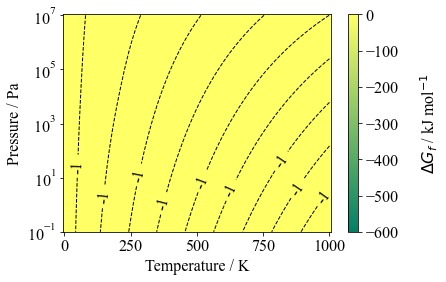

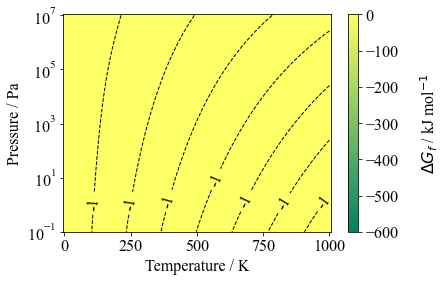

In [69]:
T = np.linspace(0, 1000, 100)  # K
P = np.array(np.logspace(-1, 7, 100), ndmin=2).transpose()  # Pa

BaS_reaction = reactions.Reaction({Ba:2,S2:3},{BaS:2,S2:2},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:2,S2:3},{BaS2:2,S2:1},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:2,S2:3},{BaS3:2},temperature=T,pressure=P,fu=8)

BaS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-2,-1])
BaS2_reaction.Dmu(xc='scan').plot_TvsP()
BaS3_reaction.Dmu(xc='scan').plot_TvsP()




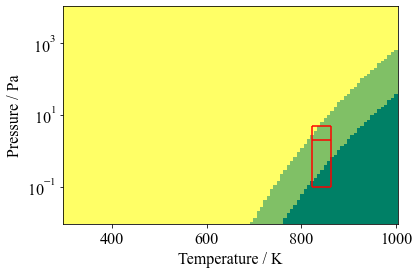

In [52]:
## See Scragg SI and Adam's paper for justification about which allotrope is the correct one to use
# oxides in nature, quite under-reported.
# precursors or reactants rather than end point.

T = np.linspace(300, 1000, 100)  # K
P = np.array(np.logspace(-2, 4, 100), ndmin=2).transpose()  # Pa

BaS_system = potentials.Potentials(BaS_reaction.Dmu(xc='scan',T=T,P=P),BaS2_reaction.Dmu(xc='scan',T=T,P=P),BaS3_reaction.Dmu(xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],T_units="K",log_scale=True)
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()


The box above shows the experimental range for Comparotto et al. The upper part of the box shows the range in which BaZrS3 was formed most successfully. Dark green is BaS, middle green BaS2, yellow BaS3.

In [53]:
print(BaS_reaction.Dmu(T=863,P=0.1,xc='scan').potential)   # these are the temps and pressures significant in Wang et al.
print(BaS2_reaction.Dmu(T=863,P=0.1,xc='scan').potential)
print(BaS3_reaction.Dmu(T=863,P=0.1,xc='scan').potential)

print(BaS_reaction.Dmu(T=863,P=2,xc='scan').potential)   # these are the temps and pressures significant in Wang et al.
print(BaS2_reaction.Dmu(T=863,P=2,xc='scan').potential)
print(BaS3_reaction.Dmu(T=863,P=2,xc='scan').potential)

#print((BaS_reaction.Dmu(T=723,P=1000).potential-BaS3_reaction.Dmu(T=773,P=1000).potential) / 4)
#print((BaS_reaction.Dmu(T=773,P=1000).potential-BaS3_reaction.Dmu(T=773,P=1000).potential) / 4)
#print((BaS_reaction.Dmu(T=823,P=1000).potential-BaS3_reaction.Dmu(T=773,P=1000).potential) / 4)





-1.1583658350718906
-1.1414955385334906
-1.0967455103818793
-1.1862140072698821
-1.1971918829367496
-1.1802900269904057


At 863K, P = 0.1, BaS is more stable by 600 meV.

So although at 863K, 2Pa BaS2 is the most stable, the difference is 17 meV!

This is bridging that 25meV/atom range where accessible

# Competing phases for the Zr-S system

Using S8 for comparison with Scragg results:

8Zr + 3S8 could form:
- 8ZrS + 2S8
- 8ZrS2 + S8
- 8ZrS3

<module 'matplotlib.pyplot' from '/Users/lucy/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

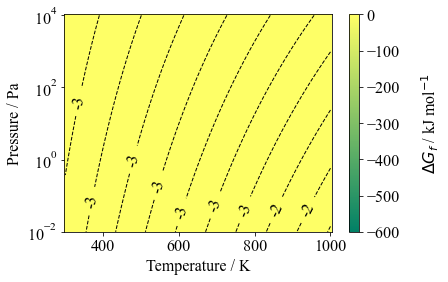

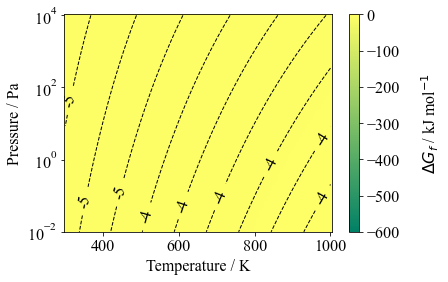

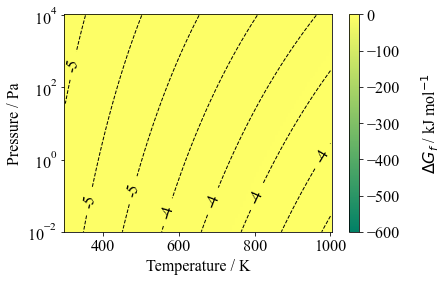

In [54]:
ZrS3_calc = calculations.AimsCalculation("../BaZrS3/raw_aims_files/binary/ZrS3_P2_1m/scan/aims.out")
ZrS3 = materials.Solid("ZrS3", {"Zr": 1, "S": 3},
                       "../BaZrS3/phonopy_output/ZrS3_P2_1m.dat",
                       calculation=ZrS3_calc)

ZrS_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS:8,S8:2},temperature=T,pressure=P,fu=8)
ZrS2_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS2:8,S8:1},temperature=T,pressure=P,fu=8)
ZrS3_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS3:8},temperature=T,pressure=P,fu=8)

ZrS_reaction.Dmu(xc='scan').plot_TvsP()
ZrS2_reaction.Dmu(xc='scan').plot_TvsP()
ZrS3_reaction.Dmu(xc='scan').plot_TvsP()


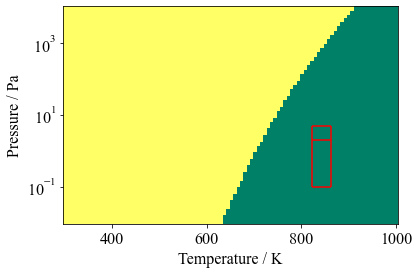

In [55]:
ZrS_system = potentials.Potentials(ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"])
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()


# dark green is ZrS2
# yellow is ZrS3

In [59]:
print(ZrS_reaction.Dmu(T=823,P=5,xc='scan').potential)   # these are the temps and pressures scragg et al
print(ZrS2_reaction.Dmu(T=823,P=5,xc='scan').potential)
print(ZrS3_reaction.Dmu(T=823,P=5,xc='scan').potential)
# So ZrS2 and ZrS3 very close: 30 meV. However wider thermal expansion of ZrS2?


-3.018922125484096
-4.769215856154915
-4.7321476774523035


# 2BaS2 + 2ZrS2 <-> 2BaZrS3 + S2


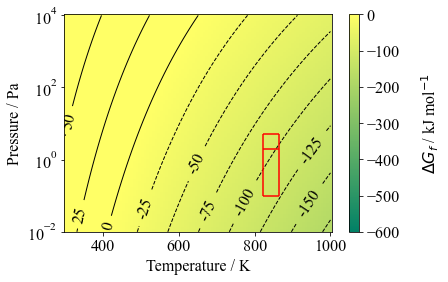

In [67]:
reaction = reactions.Reaction( {BaS2: 2, ZrS2:2},{BaZrS3: 2, S2: 1},
                                       temperature=T,
                                   pressure=P,fu=1)
GFE = reaction.Dmu(units="kJ",xc='scan')
plt=GFE.plot_TvsP(T_units='K')
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()





# 8BaS2 + 8ZrS2 <-> 8BaZrS3 + S8



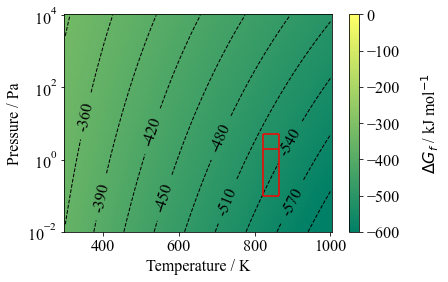

In [68]:
reaction = reactions.Reaction( {BaS2: 8, ZrS2:8},{BaZrS3: 8, S8: 1},
                                       temperature=T,
                                   pressure=P,fu=1)
GFE = reaction.Dmu(units="kJ",xc='scan')
plt=GFE.plot_TvsP(T_units='K')
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()



# BaS2 + ZrS3 <-> BaZrS3 + S2




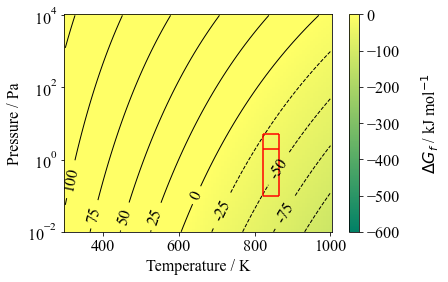

In [70]:
reaction = reactions.Reaction( {BaS2: 1, ZrS3:1},{BaZrS3: 1, S2: 1},
                                       temperature=T,
                                   pressure=P,fu=1)
GFE = reaction.Dmu(units="kJ",xc='scan')
plt=GFE.plot_TvsP(T_units='K')
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()

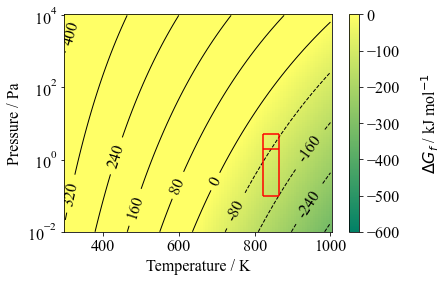

In [71]:
# 2BaS3 + 2ZrS3 <-> 2BaZrS3 + 3S2

reaction = reactions.Reaction( {BaS3: 2, ZrS3:2},{BaZrS3: 2, S2: 3},
                                       temperature=T,
                                   pressure=P,fu=1)
GFE = reaction.Dmu(units="kJ",xc='scan')
plt=GFE.plot_TvsP(T_units='K')
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()

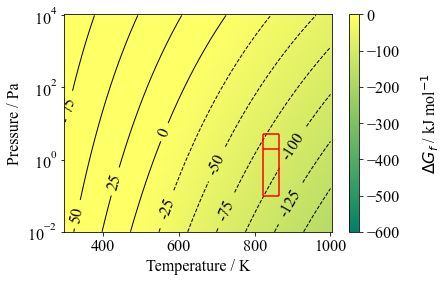

In [73]:
# 2BaS + 2ZrS3 <-> 2BaZrS3 S2

reaction = reactions.Reaction( {BaS: 2, ZrS3:2},{BaZrS3: 2, S2: 1},
                                       temperature=T,
                                   pressure=P,fu=1)
GFE = reaction.Dmu(units="kJ",xc='scan')
plt=GFE.plot_TvsP(T_units='K')
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()

# BaS3 + ZrS2  <->  BaZrS3 +  S2

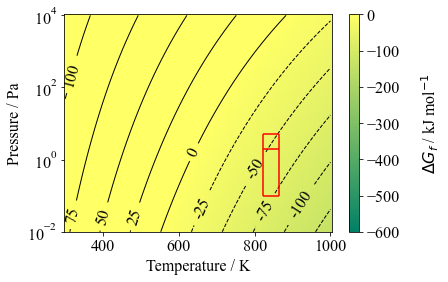

In [66]:
BaZrS3_S2_reaction = reactions.Reaction( {BaS3: 1, ZrS2:1},{BaZrS3: 1, S2: 1},
                                       temperature=T,
                                   pressure=P,fu=1)
GFE = BaZrS3_S2_reaction.Dmu(units="kJ",xc='scan')
plt=GFE.plot_TvsP(T_units='K')
plt.hlines([2,5,0.1],823,863,color='red')
plt.vlines([823,863],1E-1,5,color='red')
plt.show()

# 4BaS3 + 4ZrS2 <-> 4BaZrS3 + S8

<module 'matplotlib.pyplot' from '/Users/lucy/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

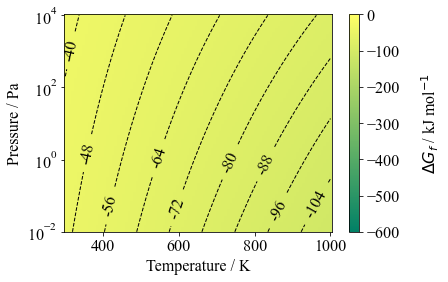

In [74]:
BaZrS3_S8_reaction = reactions.Reaction( {BaS3: 4, ZrS2:4},{BaZrS3: 4, S8: 1},
                                       temperature=T,
                                   pressure=P,fu=4)
GFE = BaZrS3_S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP()

# Experimental results

- Read Scragg again: there is a particular compounds we want??

- BaS and Zr targets were used to deposit amorphous Ba–Zr–S films by reactive
 co-sputtering in the presence of H2S. These precursors were then annealed in an inert atmosphere for crystallization. The optimal temperature to form BaZrS3 was found to be around 900 °C.

- A related case is the work by Yu et al, (31) who fabricated Ba–Zr–S layers by pulsed laser deposition (PLD). Interestingly, even with a substrate temperature as high as 700 °C in the PLD step, the as-deposited films turned out amorphous and highly sulfur-deficient.

- Wang et al. succeeded in synthesizing BaZrS3 at temperatures as low as 500
°C by solid-state reaction. They demonstrated that an overstoichiometric
quantity of S played crucial role in formation─specifically, a certain,
small S excess was required for smooth phase formation at a lower
temperature.  The addition of too little S led solely to the formation of
the binary compounds BaS, BaS2, and ZrS2, while a too large S excess
produced mainly BaS3 and ZrS3.

- Scragg et al: In qualitative agreement with Wang et al. for a very
different type of process, (36) the behavior seen in Figure 2a confirms that a certain, defined S excess is required for smooth phase formation at moderate temperatures when starting from elemental precursors.

This previous point in conjunction with our results seems to suggest that we
 do not want BaS3 formation.